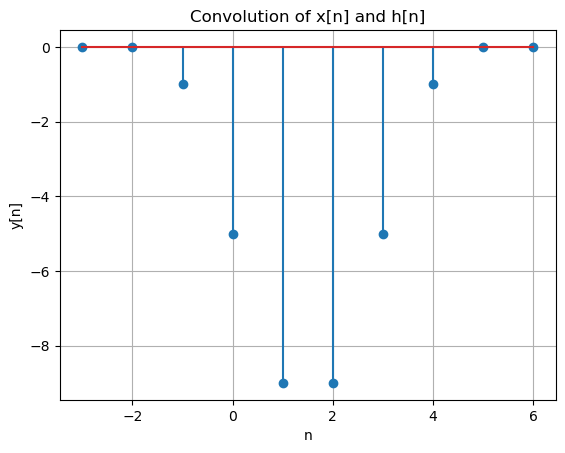

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Define x[n] with correct indexing
# Values for n = -1 to 1
x_n = np.array([0, -1, -2,-2,-1,0])

# Define h[n] with correct indexing
# Values for n = -2 to 2
h_n = np.array([0, 1, 3, 1, 0])
# Assuming x_n and h_n are already defined as arrays for convolution
y_n = np.convolve(x_n, h_n)  # Calculate the convolution

# Define the x-axis range for plotting, adjusting for index alignment
n_y = np.arange(len(y_n)) - 3  # Offset based on the starting index of y[n]

# Plot the convolution result as a stem plot
plt.stem(n_y, y_n)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('Convolution of x[n] and h[n]')
plt.grid(True)
plt.show()


In [13]:
import numpy as np  # numpy arrays
import matplotlib.pyplot as plt # data visualization
from scipy.signal import stft, get_window # spectrogram
from scipy.signal.windows import hann # preferred window
from scipy import signal 
from IPython.display import Audio # audio playback
from scipy.signal import convolve

In [8]:
fs = 40000 # Sampling frequency
T = 1.5 # Duration of signal
t = np.arange(0, T, 1/fs)  # time indexes for signal
N = int(T*fs)
# delta=0.1
mu = 5500
f0 = 1500
phi = -np.pi/5
# noise_std=1
xt = np.cos(2*np.pi*(mu*(t**2)+f0*t)+phi)  # transmitted signal
f_instant = 2*np.pi*mu*t+f0;
w = hann(1000, sym=True)  # True for symmetric hanning window and false for periodic window

# Step 2: Specify the Hop size: Must be half of the window length
h = int(w.size / 2)

# Step 3: Magnitude of the segment (optional)
# if not set, it defaults to the window length

# Step 4: specify the FFT mode
fftmode = 'centered'
# datfile='lab9data.npz'

In [9]:
# instantaneous frequency of the transmit pulse (For problem 2)
f_instant = 2*np.pi*mu*t+f0;

# Problem 2
So, f_instant = 11000t + 1500  Hz

# Probelm 3

In [12]:
# noise_std=1

datfile='lab9data.npz'
# Read data out of file, mix it and filter it

indatfile=datfile
npz_file = np.load(indatfile)

fs=npz_file['fs']
rt=npz_file['rt']
ht=npz_file['ht']

mt = xt*rt # mixed (IF) signal
yt = np.convolve(mt,ht)

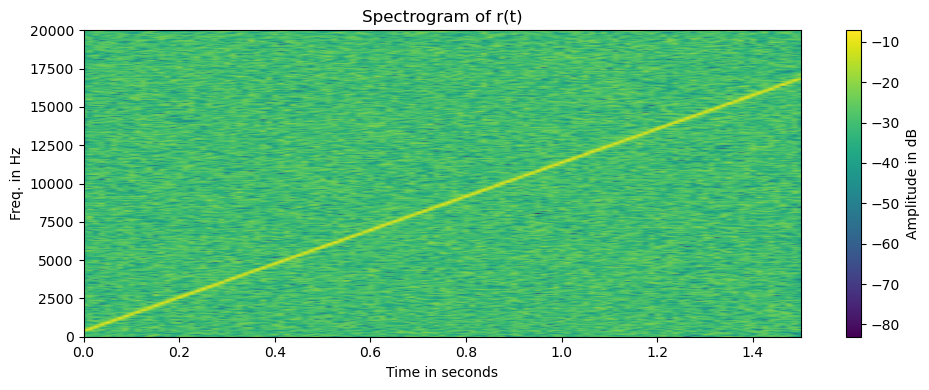

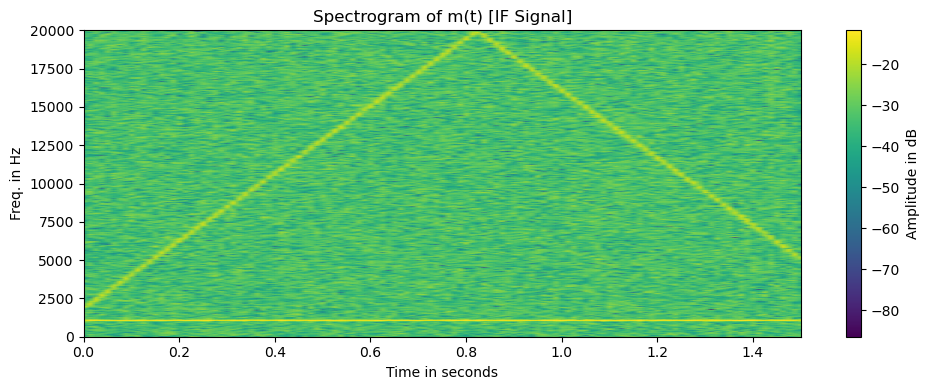

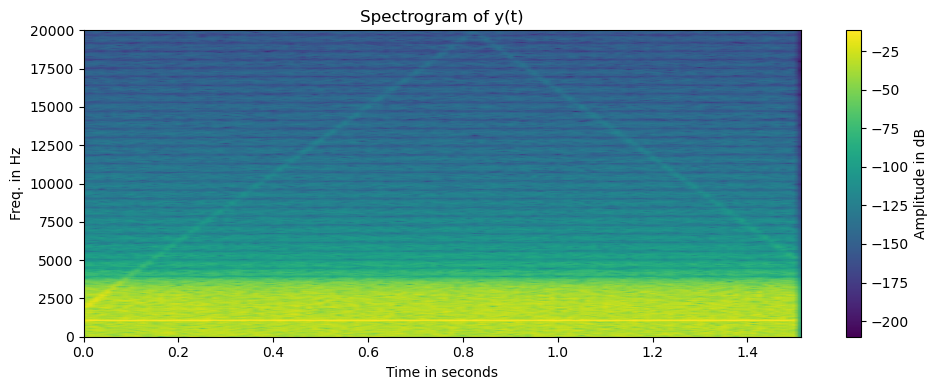

In [15]:
# Problem 3
# Plotting spectrograms of the received signal r(t), the mixed (IF) signal m(t) and the filtered signal y(t)

w = hann(1000, sym=True)
h = int(w.size / 2)

def plot_spectrogram(signal, fs, title):
    f, t, Zxx = stft(signal, fs, window=w, nperseg=w.size, noverlap=h, return_onesided=True)
    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t, f, 20 * np.log10(np.abs(Zxx)), shading='gouraud')
    plt.title(title)
    plt.ylabel('Freq. in Hz')
    plt.xlabel('Time in seconds')
    plt.colorbar(label='Amplitude in dB')
    plt.tight_layout()
    plt.show()

# Plot spectrograms
plot_spectrogram(rt, fs, 'Spectrogram of r(t)')
plot_spectrogram(mt, fs, 'Spectrogram of m(t) [IF Signal]')
plot_spectrogram(yt, fs, 'Spectrogram of y(t)')

# Problem 4
Based on the information we read from the spectrogram, the delay ∆ in seconds between the transmitted and received chirps
is **0.1 seconds**.


Estimated delay is equal to = 0.1 seconds


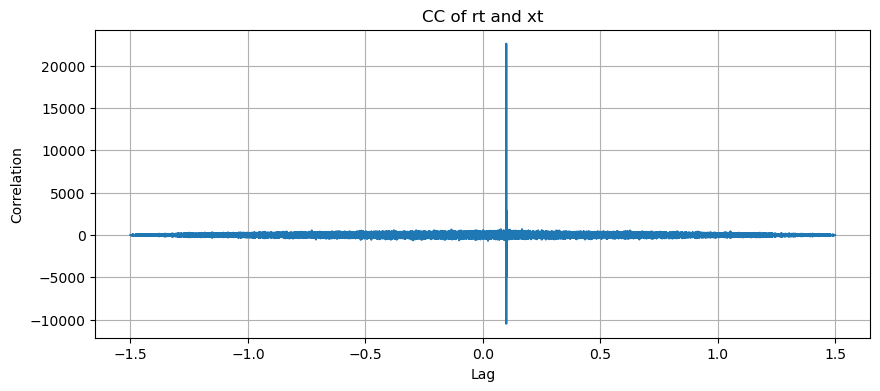

In [18]:
from scipy.signal import correlate

corr = correlate(rt, xt, mode='full')
lags = np.arange(-len(rt) + 1, len(xt))

delay_samples = lags[np.argmax(np.abs(corr))]
delay_seconds = delay_samples / fs

print(f"Estimated delay is equal to = {delay_seconds} seconds")

plt.figure(figsize=(10, 4))
plt.plot(lags / fs, corr)
plt.title('CC of rt and xt')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid()
plt.show()

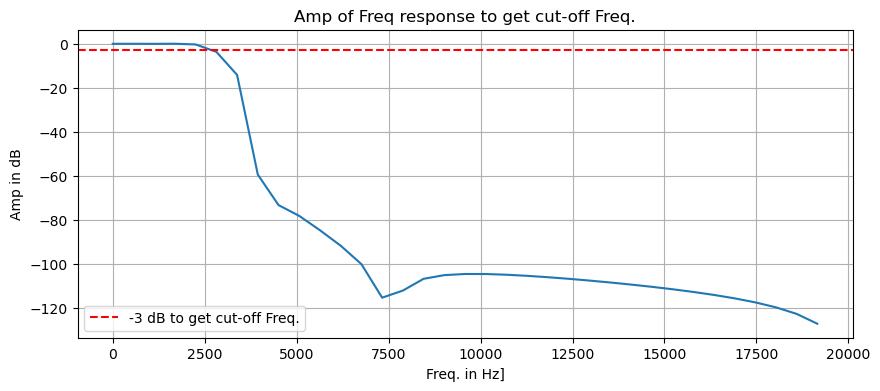

Cut-off freq =  2816.901408450704 Hz


In [22]:
# Probelm 5

from scipy.fft import fft, fftfreq

fs = npz_file['fs']
ht = npz_file['ht']

Hf = fft(ht)
frequencies = fftfreq(len(ht), d=1/fs)

plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(ht)//2], 20 * np.log10(np.abs(Hf[:len(ht)//2])))
plt.title('Amp of Freq response to get cut-off Freq.')
plt.xlabel('Freq. in Hz]')
plt.ylabel('Amp in dB')
plt.grid()
plt.axhline(y=-3, color='r', linestyle='--', label='-3 dB to get cut-off Freq.')
plt.legend()
plt.show()

cutoff_index = np.where(20 * np.log10(np.abs(Hf[:len(ht)//2])) <= -3)[0][0]
cutoff_frequency = frequencies[cutoff_index]
print(f"Cut-off freq =  {cutoff_frequency} Hz")

# Problem 5
Cut off frequency is about **2800 Hz** since it is where the magnitude dropes 3dB or becomes sqrt(2)/2 of its peak value.
The main plot used for caluclating cut off freq. was the Fourier Transform of the impulse response  h(n) to obtain its frequency response. (Note that The cutoff frequency is where the magnitude of the filter's frequency response drops to −3 dB from its Max).